In [102]:
import cv2
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from PIL import Image

Data standardization

In [57]:
files = [f for f in listdir('./Data/PNEUMONIA/') if isfile(join('./Data/PNEUMONIA/', f))]
k = 0
for file in files:
    if k < 500:
        src = cv2.imread('./Data/PNEUMONIA/'+file, cv2.IMREAD_UNCHANGED)
        dsize = (250, 250)
        output = cv2.resize(src, dsize)
        k += 1
        path = './Data_Normalized/PNEUMONIA/0_'+str(k)+'.png'
        cv2.imwrite(path,output)
    else:
        break

In [58]:
files = [f for f in listdir('./Data/NORMAL/') if isfile(join('./Data/NORMAL/', f))]
k = 0
for file in files:
    if k < 500:
        src = cv2.imread('./Data/NORMAL/'+file, cv2.IMREAD_UNCHANGED)
        dsize = (250, 250)
        output = cv2.resize(src, dsize)
        k += 1
        path = './Data_Normalized/NORMAL/1_'+str(k)+'.png'
        cv2.imwrite(path,output)
    else:
        break

# Converting an image to a vector

In [51]:
def image_to_array(path):
    x = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return x.reshape(x.shape[0]*x.shape[1])

# Loading dataset (there are 50 samples for each digit)

In [96]:
def load_data():
    X_train = np.array([image_to_array('./Data_Normalized/NORMAL/1_1.png')])
    X_test  = np.array([image_to_array('./Data_Normalized/NORMAL/1_1.png')])
    y_train = np.array([1])
    y_test  = np.array([1])
    for k in range(2,51):
        path_image = './Data_Normalized/NORMAL/1_'+str(k)+'.png'
        x = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
        if x.shape == (250,250):
            X_train = np.append(X_train, np.array([x.reshape(x.shape[0]*x.shape[1])]), axis=0)
            y_train = np.append(y_train, 1)
        path_image = './Data_Normalized/NORMAL/1_'+str(k+51)+'.png'
        x = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
        if x.shape == (250,250):
            X_test = np.append(X_test, np.array([x.reshape(x.shape[0]*x.shape[1])]), axis=0)
            y_test = np.append(y_test, 1)
    for k in range(50):
        path_image = './Data_Normalized/PNEUMONIA/0_'+str(k+1)+'.png'
        x = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
        if x.shape == (250,250):
            X_train = np.append(X_train, np.array([x.reshape(x.shape[0]*x.shape[1])]), axis=0)
            y_train = np.append(y_train, 0)
        path_image = './Data_Normalized/PNEUMONIA/0_'+str(k+51)+'.png'
        x = cv2.imread(path_image, cv2.IMREAD_UNCHANGED)
        if x.shape == (250,250):
            X_test = np.append(X_test, np.array([x.reshape(x.shape[0]*x.shape[1])]), axis=0)
            y_test = np.append(y_test, 0)
    return X_train, X_test, y_train, y_test

In [99]:
# loading dataset 
X_train, X_test, y_train, y_test = load_data()

In [98]:
X_train.shape

(98, 62500)

# Fitting the SVM model to the dataset

In [100]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

# Prediction function

In [73]:
def predict(path):
    sample = image_to_array(path)
    return clf.predict([sample])[0]

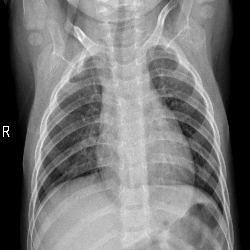

In [111]:
# path = './Data_Normalized/PNEUMONIA/0_41.png'
path = './Data_Normalized/NORMAL/1_40.png'
Image.open(path)

In [108]:
predict(path)

0

In [101]:
predicted = clf.predict(X_test)
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC():
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        49
           1       0.88      0.90      0.89        50

    accuracy                           0.89        99
   macro avg       0.89      0.89      0.89        99
weighted avg       0.89      0.89      0.89        99




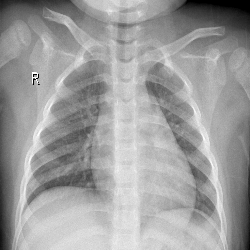

In [116]:
path = './Data_Normalized/NORMAL/1_41.png'
Image.open(path)

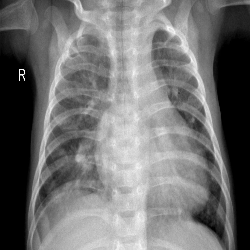

In [123]:
path = './Data_Normalized/PNEUMONIA/0_20.png'
Image.open(path)